<a href="https://colab.research.google.com/github/dolmani38/concept_drift/blob/main/synthetic_data_generation_0125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def seed_everything(seed: int = 46):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

# rule을 바꾼 concept drift...

In [115]:
import random

seed_everything(seed=49)

data_x = {}
weight = {}
errors = []
for f in range(10):
    data_x[f'x{f}'] = []
    weight[f'w{f}'] = []
    d1 = random.uniform(0.5, 10.0)
    d2 = random.uniform(0.0, 0.001)
    d3 = random.uniform(0.0, 0.003)
    w = random.uniform(0, 5)
    w_delta = random.uniform(-0.003, 0.001)
    for i in range(1000):
        for j in range(10):
            data_x[f'x{f}'].extend(np.random.normal(d1+((i*0.1)*d2),2.0+((i*0.1)*d3),100))
            weight[f'w{f}'].extend(w + (w_delta*(i*0.1))+np.random.normal(0.0,0.01,100))
            #weight[f'w{f}'].extend(w + np.random.normal(0.0,0.01,100))

for i in range(10000):        
    errors.extend(np.random.normal(1.0,10.0,100))

dataset = pd.DataFrame(data_x)
importance = pd.DataFrame(weight)

y=np.sum(np.multiply(importance.values,dataset.values),axis=1) + np.asarray(errors)

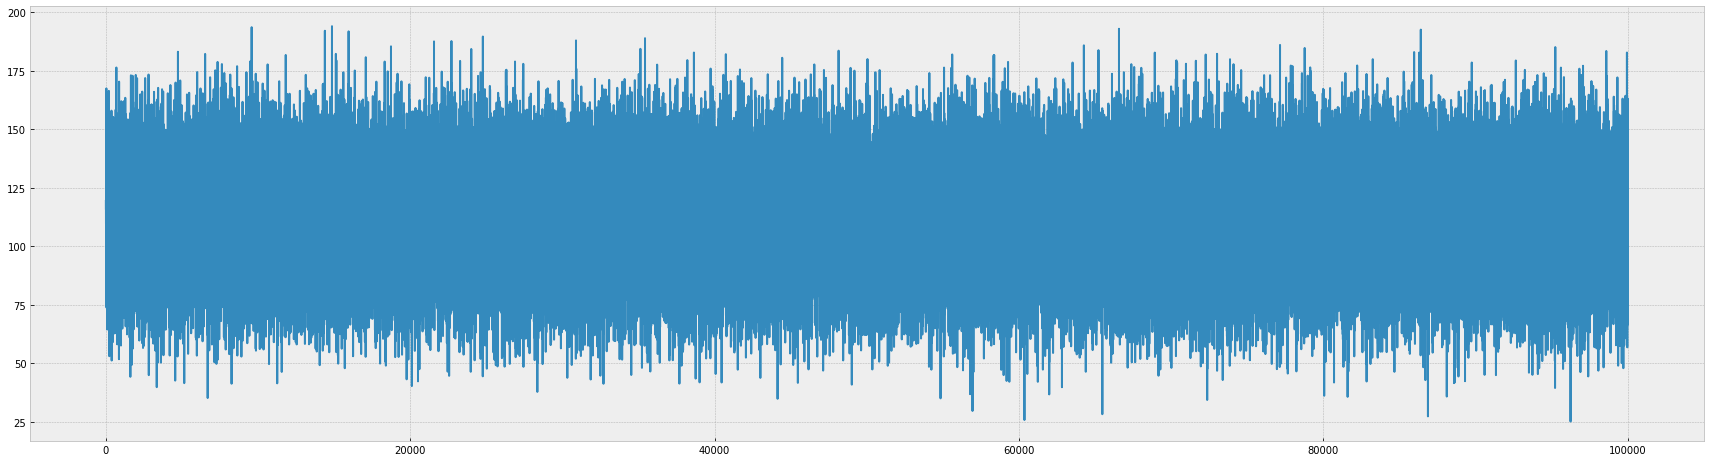

In [116]:
plt.figure(figsize=(30,8))
plt.plot(y[0:100000])

In [121]:
dataset['y'] = [1 if i > 120 else 0 for i in y]

In [122]:
# 여기서 rule을 중간에 바꾸어서 concept drift 유도한다.
dataset[600000:]['y'] = [1 if i > 130 else 0 for i in y[600000:]]

<ipython-input-122-98a84171b3d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[600000:]['y'] = [1 if i > 130 else 0 for i in y[600000:]]


In [123]:
dataset

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,-0.950920,2.748106,7.501666,4.840415,8.122025,6.316098,-0.042075,3.115949,6.970922,6.259363,0
1,-0.506314,1.308332,5.445879,4.479479,7.744861,6.617711,1.459175,4.536093,8.216163,9.639298,0
2,2.465689,3.040106,5.642933,3.082468,10.256823,6.289697,-1.523206,3.227272,5.180475,3.466466,0
3,4.780652,-0.081767,3.721707,3.335452,6.180209,8.973189,3.689015,3.327651,4.933986,4.003984,0
4,-1.747769,2.926904,9.233673,5.440752,9.115037,1.995081,-1.288068,2.690642,4.888923,5.571509,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,-1.576418,-1.239457,5.433285,1.703320,9.288065,5.213911,-1.359224,4.574618,1.322746,4.829311,0
999996,3.032708,-0.020705,4.728692,5.509150,6.814723,7.324809,3.346823,4.232451,2.350355,5.846183,0
999997,2.758966,2.937726,5.645603,6.680532,7.981809,7.479303,2.931114,5.795419,4.277461,3.959941,1
999998,0.133870,0.011191,6.344014,8.113494,7.551692,3.969307,5.018857,7.021494,6.019817,7.860877,1


In [ ]:
dataset.to_csv('/content/drive/MyDrive/laos/synthetic_dataset_2_0115.csv')

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

trainset = dataset[0:10000].drop(columns=['y']).values
train_y = dataset[0:10000]['y'].values
business_model = RandomForestClassifier(n_estimators=80,max_depth=5)
business_model.fit(trainset,train_y)
testset = dataset[10000:14000].drop(columns=['y']).values
test_y = dataset[10000:14000]['y'].values

base_score = precision_recall_fscore_support(test_y, business_model.predict(testset),average='binary')

base_score

(0.8179611650485437, 0.5117691723614275, 0.6296123306865951, None)

In [40]:

def __ks_2samp2(sample1, sample2):
    # Gets all observations
    sample1 = np.sort(sample1)
    sample2 = np.sort(sample2)
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]   
    data_all = np.concatenate([sample1, sample2])
    cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
    cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
    # Evaluates the KS statistic
    cddiffs = cdf1 - cdf2
    minS = -np.min(cddiffs)
    maxS = np.max(cddiffs)
    ks_stat =  max(minS, maxS)
    
    #if ks_stat == minS:
    #    ks_stat = -ks_stat
    
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(n1), float(n2)
    en = m * n / (m + n)
    p_value = 0.0 #stats.kstwobign.sf(math.sqrt(en) * abs(ks_stat))
    #p_value = stats.kstwobign.sf(en * abs(ks_stat))
    return ks_stat,p_value

def __ks_drift(ref_x,inf_x):
    x_drift = np.zeros((ref_x.shape[1],2))
    for i in range(ref_x.shape[1]):
        #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
        s, p = __ks_2samp2(ref_x[:,i],inf_x[:,i])
        x_drift[i,0] = s
        x_drift[i,1] = p
    return x_drift

In [125]:
X2 = dataset[14000:].drop(columns=['y']).values
Y2 = dataset[14000:]['y'].values

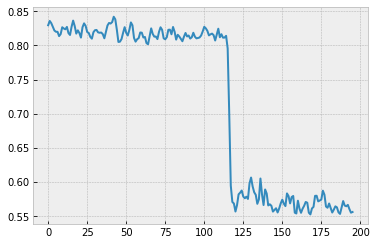

In [126]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    f1 = precision_recall_fscore_support(uy, business_model.predict(ux),average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))

result_df = pd.DataFrame(result)
result_df['precision'].plot()

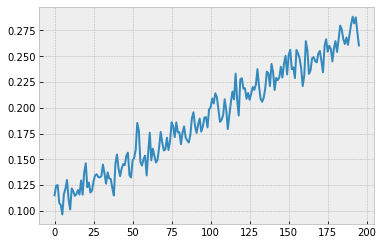

In [127]:
result_df['drift'].plot()

## 여기서, MI를 측정한다.

In [128]:

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

  feature  importance
0      x4    0.068871
1      x8    0.049694
2      x0    0.033831
3      x2    0.025419
4      x7    0.024598
5      x3    0.015106
6      x6    0.005974
7      x1    0.005793
8      x5    0.000965
9      x9    0.000000


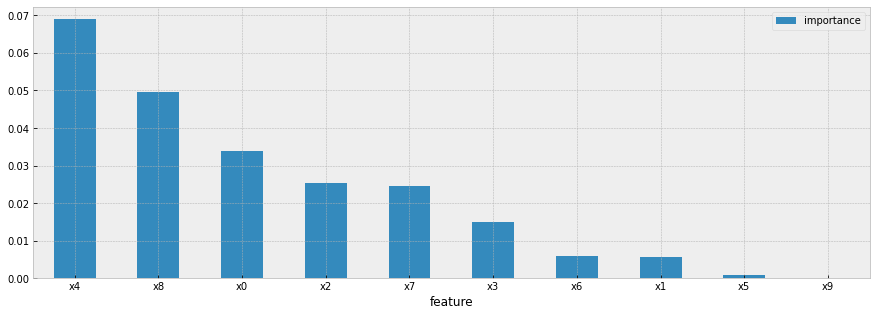

In [129]:
COLUMNS = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9']
mi_scores = make_mi_scores(pd.DataFrame(trainset,columns=COLUMNS), train_y, discrete_features="auto")
imp_df_mi = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))

imp_df3 = pd.DataFrame({'feature':mi_scores.keys()[:10],'importance':mi_scores.values[:10]})
print(imp_df3)
imp_df3.plot.bar(x='feature',rot=0,figsize=(15,5))

In [130]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []

#MI
mi_scores = make_mi_scores(pd.DataFrame(trainset,columns=COLUMNS), train_y, discrete_features="auto")
imp_df_mi = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
imp_df_mi2 = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    y_ = business_model.predict(ux)
    f1 = precision_recall_fscore_support(uy,y_ ,average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))
    #MI
    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), uy, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), y_, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi2.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    print(f"\r{i+1}/{batch} f1:{f1[0]:.4f}", end="", flush=True)


196/196 f1:0.5561

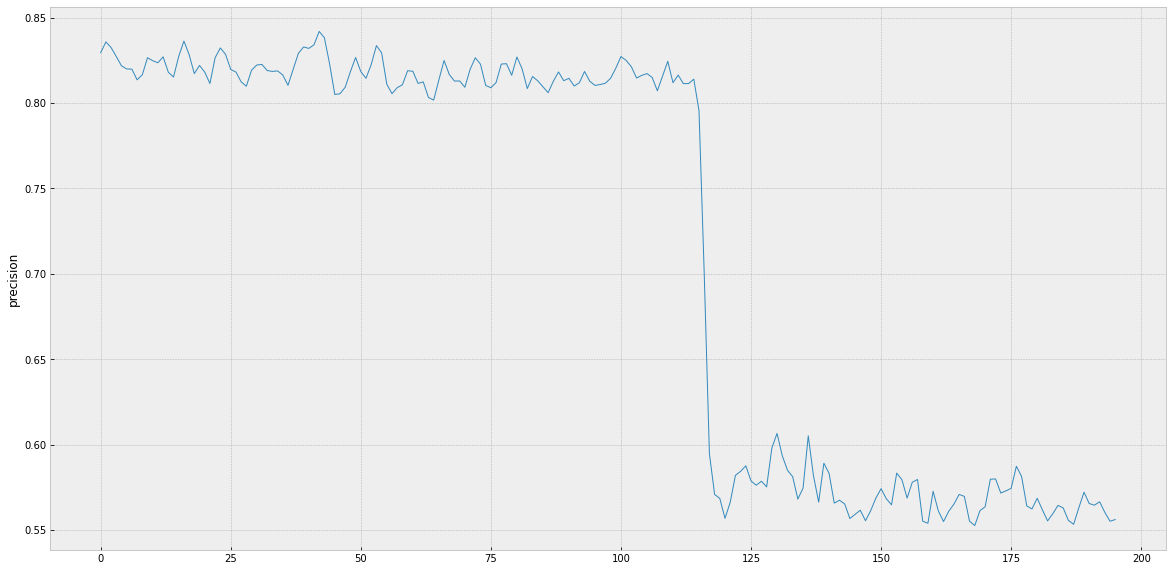

In [131]:
plt.style.use('bmh')

result_df = pd.DataFrame(result)
result_df['precision'].plot(ylabel='precision',linewidth=1,figsize=(20,10))

[]

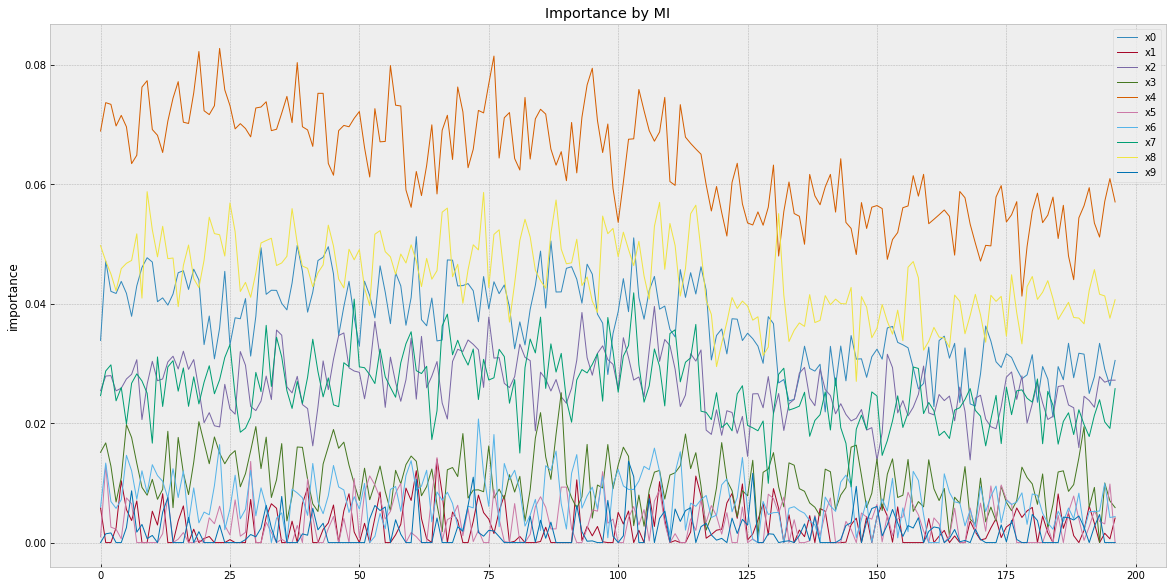

In [132]:
ax = imp_df_mi.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

[]

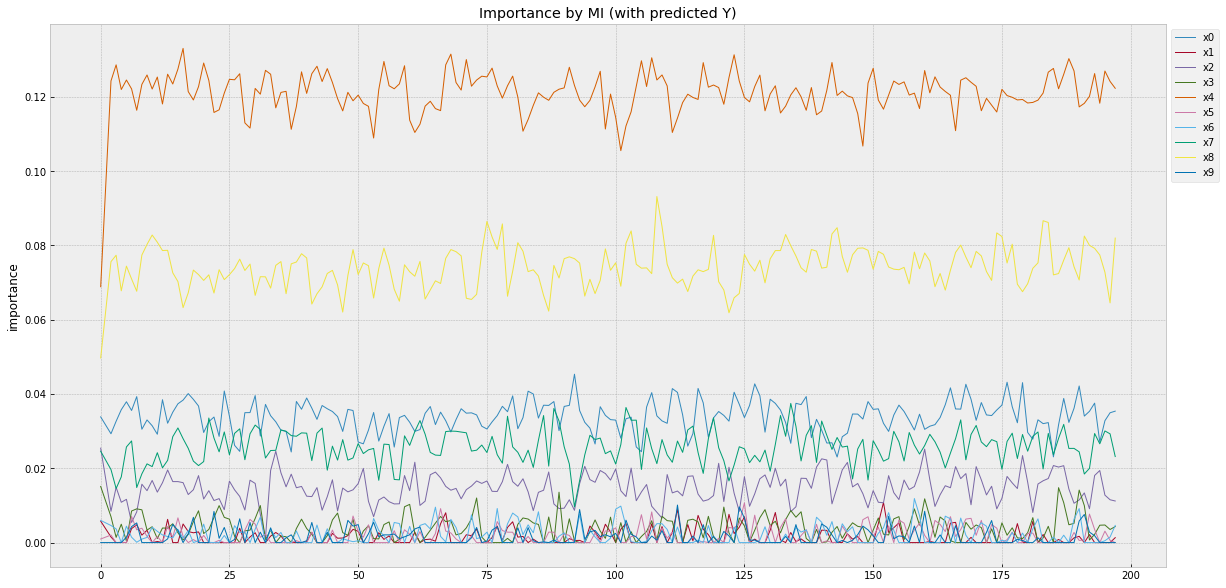

In [133]:
ax = imp_df_mi2.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI (with predicted Y)",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

### 결론

rule을 바꾼 concept drift는 MI에서 변화를 감지 할 수 없다... 당연한거 아님!!!

# weight를 흔든 concept drift

In [148]:
import random

seed_everything(seed=50)

data_x = {}
weight = {}
errors = []
for f in range(10):
    data_x[f'x{f}'] = []
    weight[f'w{f}'] = []
    d1 = random.uniform(0.5, 10.0)
    d2 = random.uniform(0.0, 0.001)
    d3 = random.uniform(0.0, 0.003)
    w = random.uniform(0, 5)
    w_delta = random.uniform(-0.003, 0.001)
    for i in range(1000):
        for j in range(10):
            data_x[f'x{f}'].extend(np.random.normal(d1+((i*0.1)*d2),2.0+((i*0.1)*d3),100))
            # 중간에 weight를 흔들어서, concept drift를 유도 한다???
            if i > 500 and (f==0 or f==5):
                weight[f'w{f}'].extend(w*2 + (w_delta*(i*0.1))+np.random.normal(0.0,0.01,100))
            else:
                weight[f'w{f}'].extend(w + (w_delta*(i*0.1))+np.random.normal(0.0,0.01,100))
            #weight[f'w{f}'].extend(w + np.random.normal(0.0,0.01,100))

for i in range(10000):        
    errors.extend(np.random.normal(1.0,10.0,100))

dataset = pd.DataFrame(data_x)
importance = pd.DataFrame(weight)

y=np.sum(np.multiply(importance.values,dataset.values),axis=1) + np.asarray(errors)

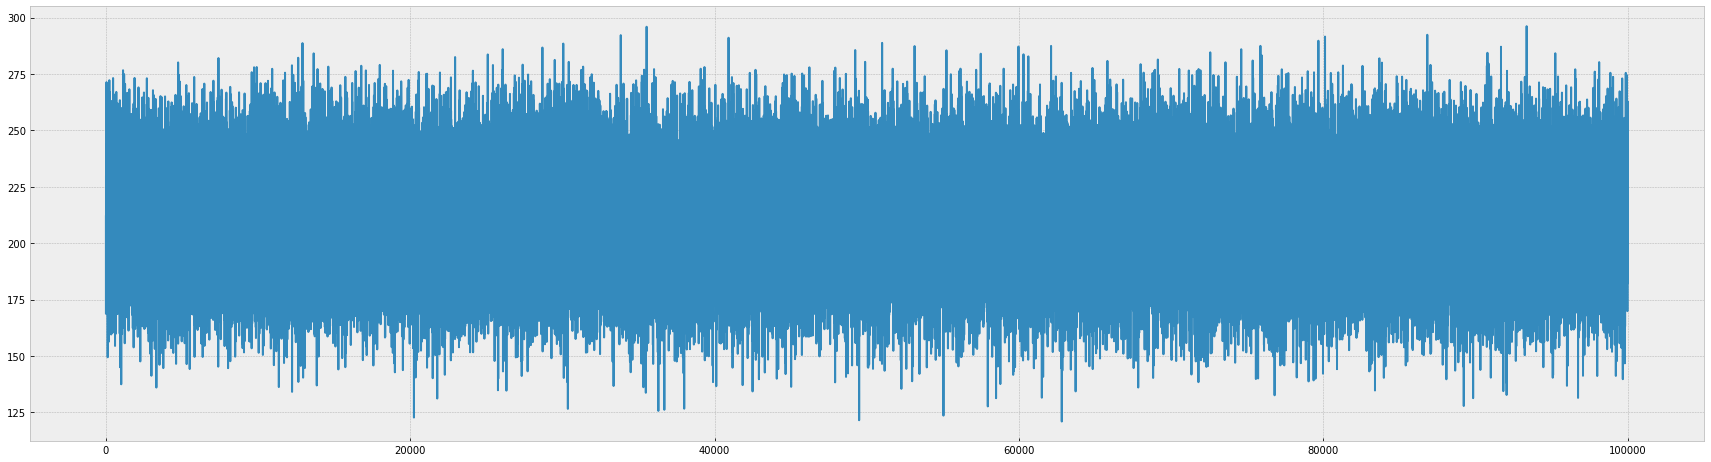

In [149]:
plt.figure(figsize=(30,8))
plt.plot(y[0:100000])

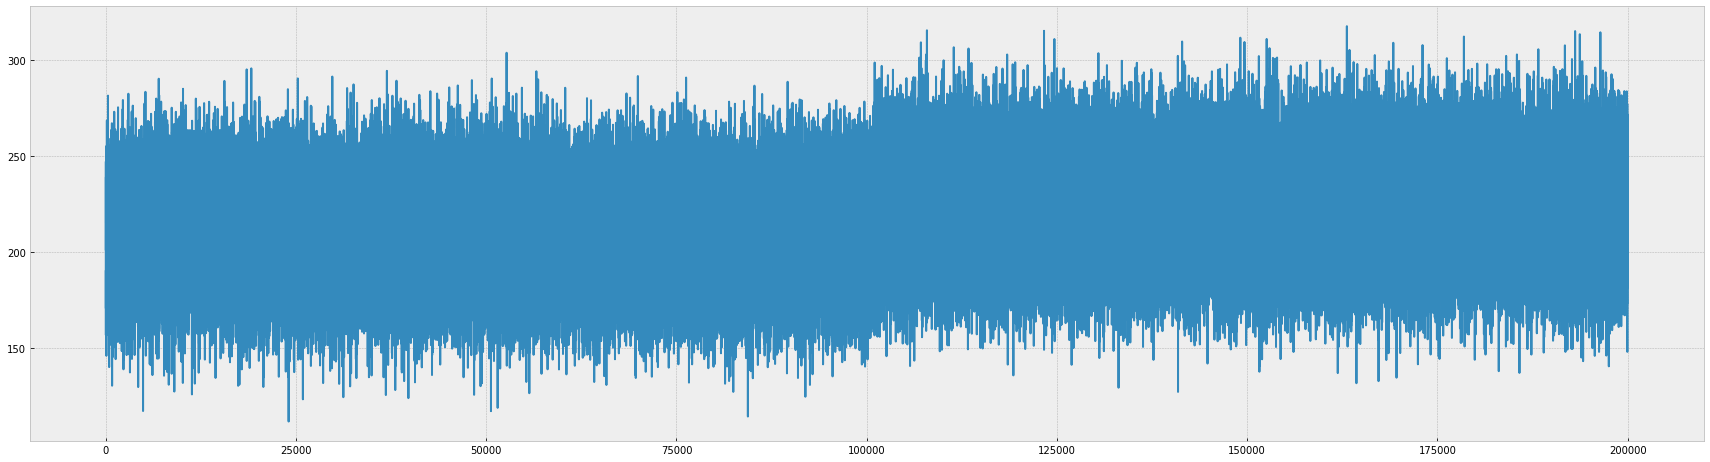

In [150]:
plt.figure(figsize=(30,8))
plt.plot(y[400000:600000])

In [151]:
dataset['y'] = [1 if i > 175 else 0 for i in y]

In [152]:
dataset

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,2.105893,7.366571,1.437981,6.918750,10.484143,6.137934,6.396162,3.603515,8.535729,12.832618,1
1,5.164642,8.629367,2.597481,7.324340,4.875789,3.269655,11.145013,6.388404,5.438990,11.232842,1
2,3.984741,12.822363,0.966768,10.431717,3.678562,3.754865,9.671218,2.001624,7.417953,10.426380,1
3,2.297436,9.373051,1.809793,8.818414,5.423546,6.704477,7.587117,-1.133183,6.115283,7.710959,0
4,8.050490,8.419972,0.790558,10.553574,10.509574,5.370689,4.453984,6.379855,8.804941,10.925791,1
...,...,...,...,...,...,...,...,...,...,...,...
999995,5.932290,6.294791,2.266784,9.070873,13.700962,5.462838,6.956947,4.355408,9.013101,10.526103,1
999996,10.491803,10.690322,2.617203,8.730331,10.064680,6.104650,5.881743,1.125269,5.214156,9.268918,1
999997,5.804875,16.922156,2.102498,9.479150,6.950235,8.222249,8.003673,5.874007,6.500057,13.005442,1
999998,5.145164,10.228025,4.408613,7.726727,8.990129,8.149617,8.065981,0.959824,4.796918,14.735596,1


In [153]:
trainset = dataset[0:10000].drop(columns=['y']).values
train_y = dataset[0:10000]['y'].values
business_model = RandomForestClassifier(n_estimators=80,max_depth=5)
business_model.fit(trainset,train_y)
testset = dataset[10000:14000].drop(columns=['y']).values
test_y = dataset[10000:14000]['y'].values
base_score = precision_recall_fscore_support(test_y, business_model.predict(testset),average='binary')
base_score

(0.9515, 1.0, 0.9751473225723802, None)

In [154]:
X2 = dataset[14000:].drop(columns=['y']).values
Y2 = dataset[14000:]['y'].values

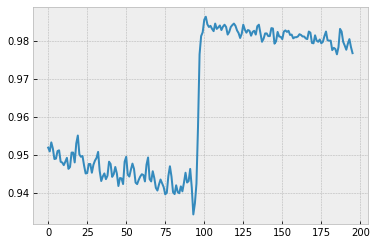

In [155]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    f1 = precision_recall_fscore_support(uy, business_model.predict(ux),average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))

result_df = pd.DataFrame(result)
result_df['precision'].plot()

In [141]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []

#MI
mi_scores = make_mi_scores(pd.DataFrame(trainset,columns=COLUMNS), train_y, discrete_features="auto")
imp_df_mi = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
imp_df_mi2 = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    y_ = business_model.predict(ux)
    f1 = precision_recall_fscore_support(uy,y_ ,average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))
    #MI
    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), uy, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), y_, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi2.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    print(f"\r{i+1}/{batch} f1:{f1[0]:.4f}", end="", flush=True)


196/196 f1:0.7996

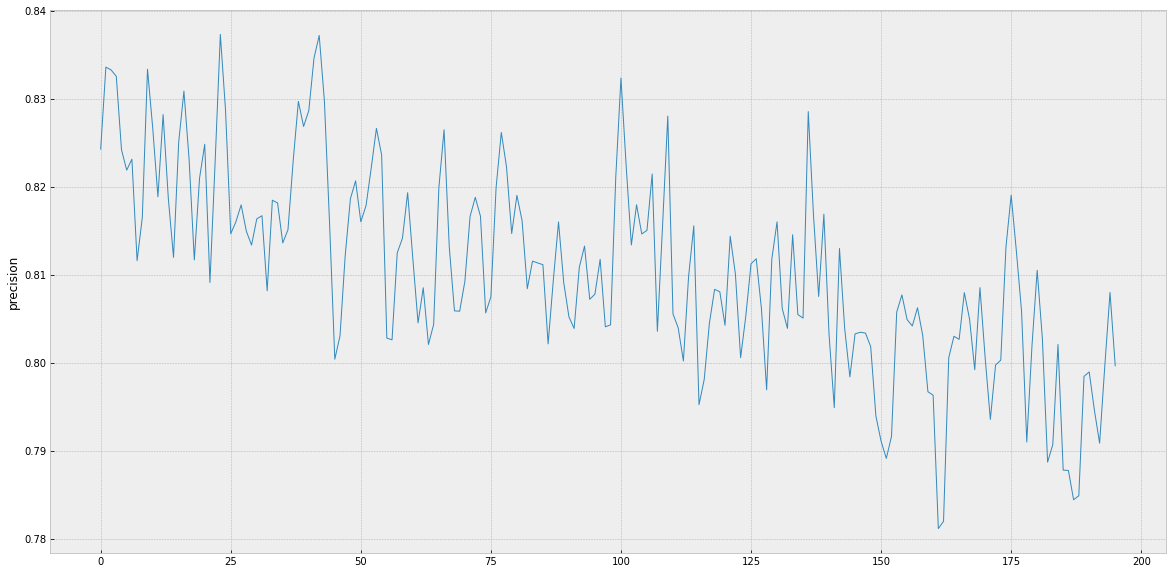

In [142]:
plt.style.use('bmh')

result_df = pd.DataFrame(result)
result_df['precision'].plot(ylabel='precision',linewidth=1,figsize=(20,10))

[]

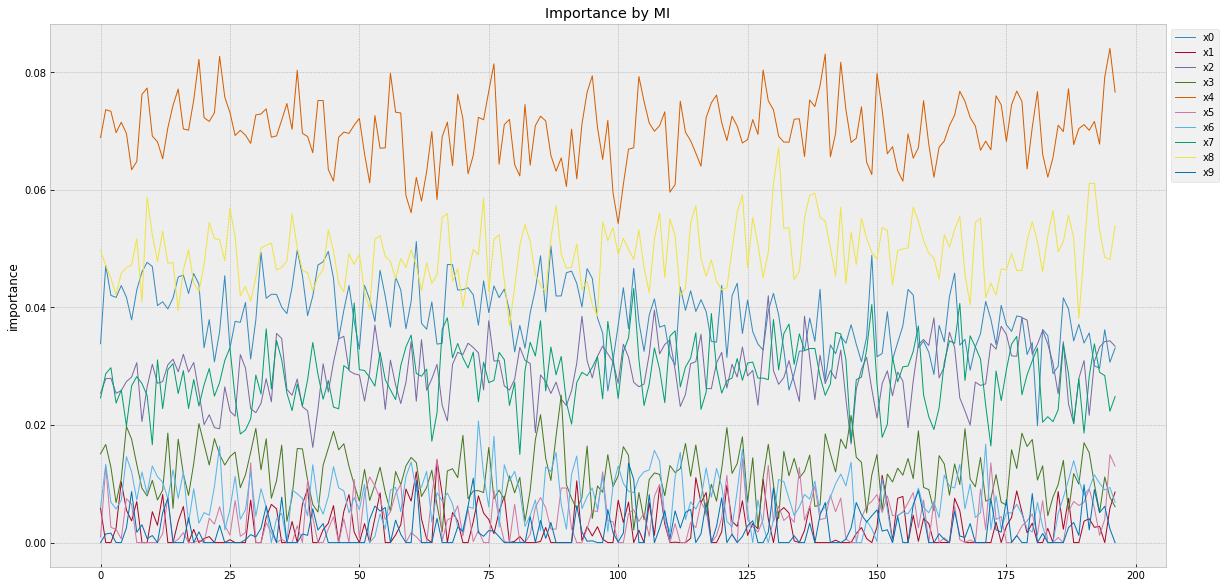

In [143]:
ax = imp_df_mi.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

[]

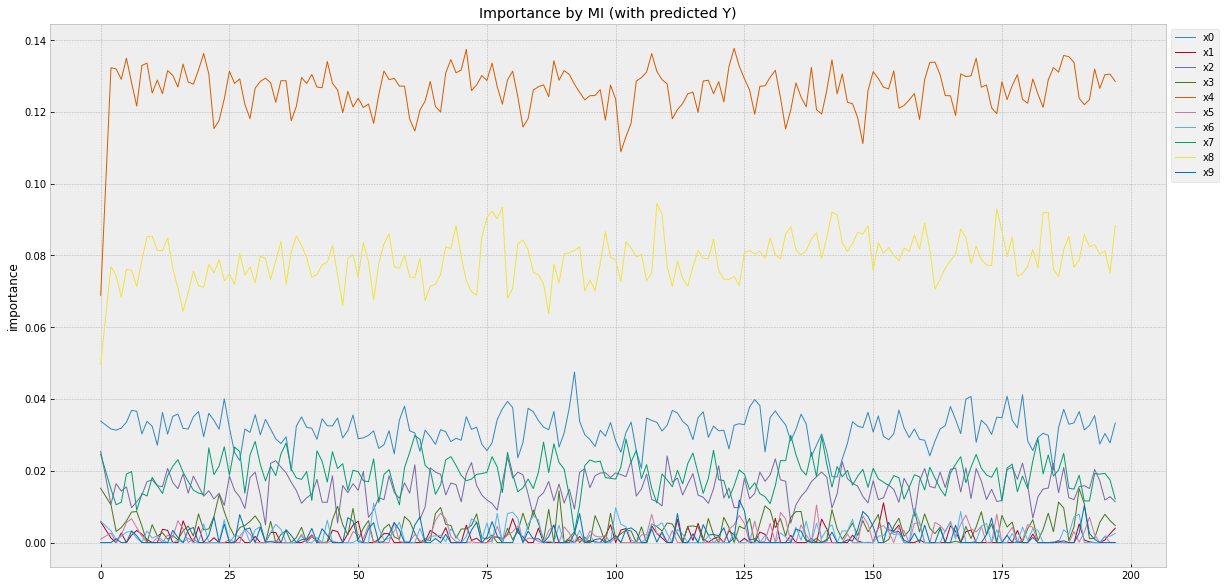

In [144]:
ax = imp_df_mi2.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI (with predicted Y)",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()